# Neuron calcium activity inside C. Elegans brain

## 1. Load the data and get to know it

When dealing with a new dataset, we need to ask these basic questions about the data:
- what is the data trying to describe?
- how was the data acquired?
- what were the conditions when data was acquired?
- what physical/chemical/... phenomena can affect the process of data acquisition?
- what types of questions need to be answered using this data?

Then after acquiring as much information about the data as possible, it's time to explore it ourselves! As "Scientists" we need to think critically about everything, especially the data that we acquire. There are ocassions in which the integrity, validity, interpretation, etc. are faulty and need to be revised.

In order to answer these questions it is usually necessary to thoughtfully analyze the data and have contact with the provider of the data along the way. Unfortunately, it is not feasible to contact the data providers for this lab, but it is still good practice to ask yourself (or your TAs) these questions as you continue with this analysis. Additionally, this lab will teach you how to engage with new and unfamiliar datasets; understanding the data that you have been provided, posing new questions, and finding the answers to these questions.

## Photobleaching
> [Photobleaching][1] is referred to the photochemical alteration of a dye or a fluorophore molecule such that it is permanently unable to fluoresce.

The main aim of this homework is to observe, quantify and analyze an example of fluorophore bleaching. In this dataset, the bleaching is reflected as a decrease in the intensity of the pixels.

[1]: https://en.wikipedia.org/wiki/Photobleaching

### 1.2 Load the data

Load the data and retrieve one of the `GCaMP activity data` from the data file.

There are three neuron GCaMP datasets that you can choose from to analyze. Replace the filename with 'NeuronGCaMP_1', 'NeuronGCaMP_2', or 'NeuronGCaMP_3' if you would like to look at a different neuron.

In [ ]:
from h5py import File as h5File
with h5File("PHYS5318_Experiment2_datasets/NeuronGCaMP_3.h5") as file:
    img_gcamp = file['data'][:]

In [ ]:
print( "type of the `file` object:", type(file) )
print( "shape/dimensions of the data:", img_gcamp.shape )  # shape = ( timestamps, width of the image, height of the image )
print( "pixel value at time index `10`, width index `15` and height index `20`: ", img_gcamp[10,15,20] )
print( "pixel values at during time index `5` through `10`, width index `15` and `20`, and height index `20` and `25`: ", img_gcamp[5:10,15:20,20:25] )

type of the `file` object: <class 'h5py._hl.files.File'>
shape/dimensions of the data: (1650, 41, 41)
pixel value at time index `10`, width index `15` and height index `20`:  0.0
pixel values at during time index `5` through `10`, width index `15` and `20`, and height index `20` and `25`:  [[[1. 0. 0. 0. 0.]
  [2. 0. 0. 0. 0.]
  [3. 2. 0. 0. 0.]
  [4. 4. 1. 1. 0.]
  [7. 6. 1. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [2. 0. 0. 0. 0.]
  [2. 0. 0. 0. 0.]
  [2. 2. 2. 0. 0.]
  [8. 5. 2. 0. 0.]]

 [[1. 0. 0. 0. 0.]
  [2. 0. 0. 0. 0.]
  [5. 1. 0. 0. 0.]
  [7. 3. 0. 0. 0.]
  [9. 7. 1. 0. 0.]]

 [[0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0.]
  [1. 1. 0. 0. 0.]
  [7. 4. 1. 0. 0.]
  [8. 3. 1. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [2. 0. 0. 0. 0.]
  [3. 2. 0. 0. 0.]
  [5. 2. 0. 0. 0.]
  [7. 5. 0. 0. 0.]]]


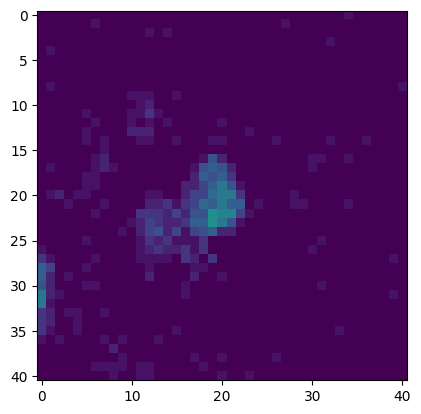

In [ ]:
# Q1.2.1: plot first and last frames, e.g. img_gcamp[0,:,:] is the first frame
# Hint1: use the plotting function `matplotlib.pyplot.imshow` from `matplotlib` module (documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
# Hint2: use the arguments `vmin=0` and `vmax=vmax` to avoid automatic adjustment of brightness by matplotlib
import matplotlib.pyplot as plt
vmax = img_gcamp.max()
vmin = 0
plt.imshow(img_gcamp[0,:,:], vmin = 0, vmax = vmax)

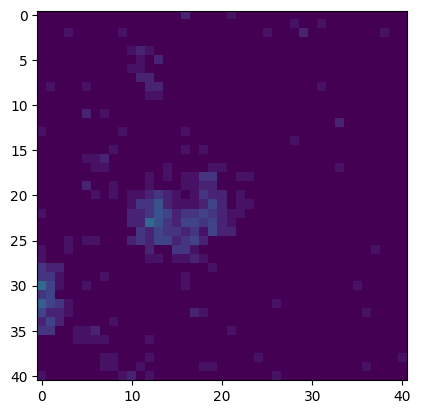

In [ ]:
plt.imshow(img_gcamp[1649,:,:], vmin = 0, vmax = vmax)

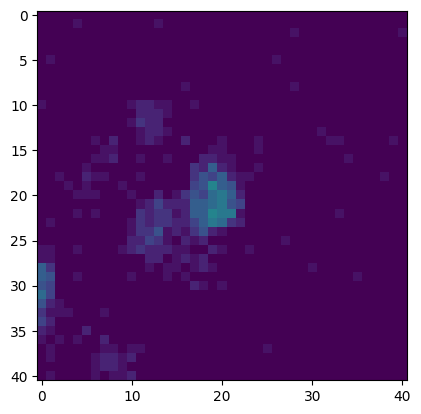

In [ ]:
# Q1.2.2: plot a few more frames to show photobleaching over time
plt.imshow(img_gcamp[1,:,:], vmin = 0, vmax = vmax)

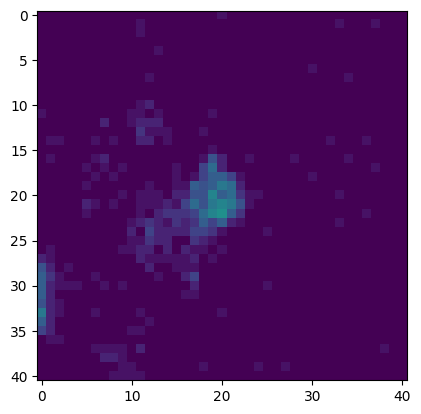

In [ ]:
plt.imshow(img_gcamp[2,:,:], vmin = 0, vmax = vmax)

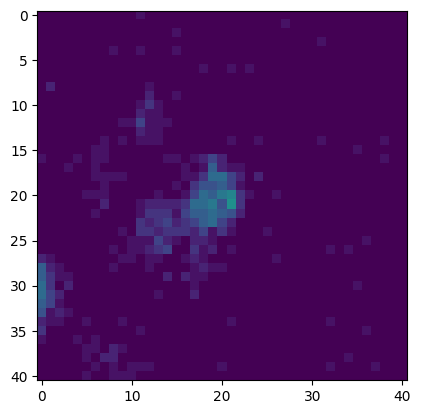

In [ ]:
plt.imshow(img_gcamp[3,:,:], vmin = 0, vmax = vmax)

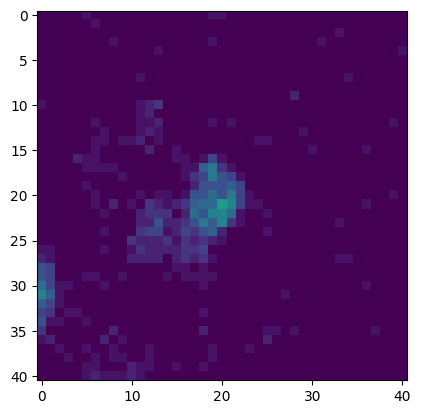

In [ ]:
plt.imshow(img_gcamp[4,:,:], vmin = 0, vmax = vmax)

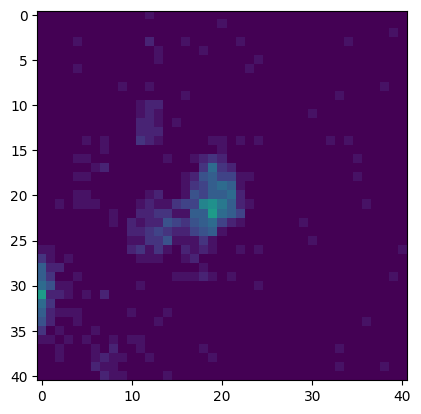

In [ ]:
plt.imshow(img_gcamp[5,:,:], vmin = 0, vmax = vmax)

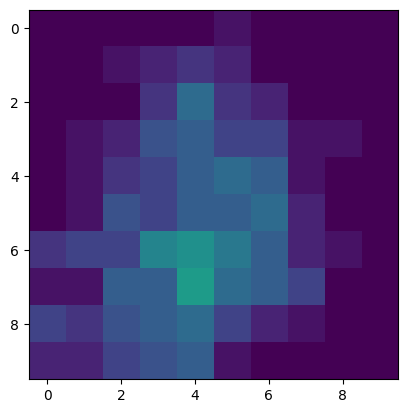

In [ ]:
# Q1.2.3: can we use a smaller region in each frame/image to extract brightness and observe bleaching?
plt.imshow(img_gcamp[5,15:25,15:25], vmin = 0, vmax = vmax)

### 1.3 Noise in the data
Arrays of sensors in the cameras can record random noise due to a multitude of sources, [Image Noise - Types][6]. In this dataset the noise is indpendent and sparse. One method to reduce this type of noie is blurring or spatial-smoothing. Within this category of blurring there are multiple different approaches: replace every pixel by the average of surrounding pixels (e.g. [8-connectivity][1]), more continuous blurring methods, e.g. [Gaussian Blur][2], more statistically robust blurring methods, e.g. [Median Filtering][3].

We will use a less aggressive blurring by applying [Box Averaging][4] of size (3,3) to all the frames.

```python
import cv2 as cv  # OpenCV Version at 2023/07/06
# Do not use `cv.imshow` for this tutorial and in this notebook
```

[1]: https://en.wikipedia.org/wiki/Pixel_connectivity#8-connected
[2]: https://en.wikipedia.org/wiki/Gaussian_blur
[3]: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9
[4]: https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37
[5]: https://pypi.org/project/opencv-python/
[6]: https://en.wikipedia.org/wiki/Image_noise#Types

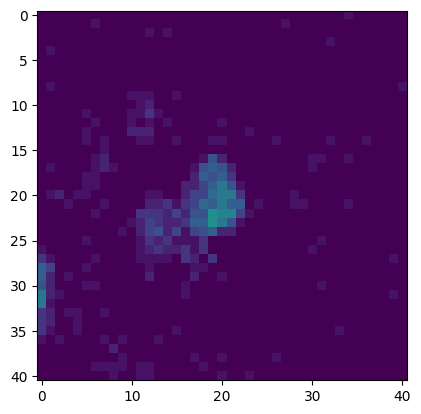

In [ ]:
# Q1.3.1: plot the first frame to have it here as a reference for comparison
plt.imshow(img_gcamp[0,:,:], vmin = 0, vmax = vmax)

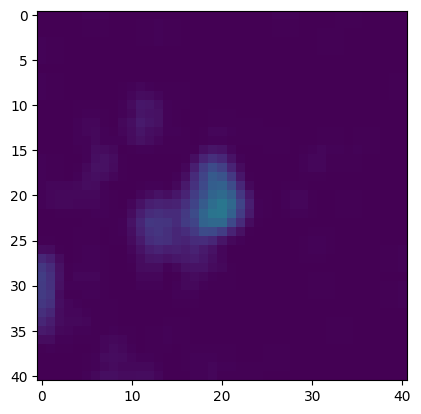

In [ ]:
# Q1.3.2: apply a box blur of size (3,3) on the first frame and plot it
# hint: box blur is available as a function in the `cv` module -> `cv.blur` (documentation: Image Blurring section at https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)
import cv2 as cv
img_gcamp_blur = img_gcamp
smoothed_image = cv.blur(img_gcamp_blur[0,:,:], (3,3), 0)
plt.imshow(smoothed_image, vmin = 0, vmax = vmax)
#plt.imshow(smoothed_image[15:25,15:25], vmin = 0, vmax = vmax)

In [ ]:
# Q1.3.3: compare the blurred with the original first frame qualitatively
# Although the pictures/plots look similar, it is important to use the blurred version. Explain why this is so.

#reduced noise, it is smoother, etc

In [ ]:
# Q1.3.4: apply the blurring in a for loop and store the blurred frames in a new array of the same shape of `img_gcamp`
# name the blurred array `img_gcamp_blurred`
# Hint1: if you use a list to store frames, don't forget to convert to numpy arrays again, e.g. np.array(LIST_VARIABLE)
import numpy as np
img_gcamp_blurred = img_gcamp
for i in enumerate(img_gcamp[:, 0, 0]):
    img_gcamp_blurred[i[0]] = cv.blur(img_gcamp_blur[i[0],:,:], (3,3), 0)

#plt.imshow(img_gcamp_blurred[1649], vmin = 0, vmax = vmax)

> We will cary out the rest of the analysis only using the `img_gcamp_blurred` image frames.

## 2. Localize the cell
Now that we've taken a look at the original and done some blurring (e.g. spatial smoothing) to the images, it's time to localize the cell's bright spot. For the sake of analyzing the bleaching effect, we need to identify some region inside the cell and track it's brightness properties throughout the imaging session.

To localize the a region inside the cell, we will use a fixed mask over multiple time frames to extract both spatial and temporal variations in pixel intensities.

### 2.1 Mask a specific region in all frames
By looking at frames at multiple times, we will define a mask that corresponds to bright regions inside the cell. This region should be small enough to ignore dark regions outside or on the boundary of the cell, while still large enough to capture some spatial variations inside the cell (possibly due to inevitable imaging noises).

After that, we will define and quantify statistics which capture the behavior of bleaching over time.

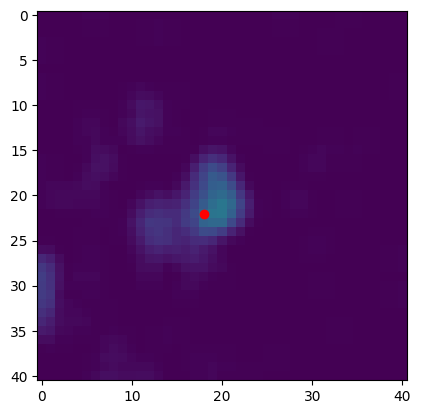

In [ ]:
# Q2.1.1 find a fixed point that is within a bright region inside the cell. As the cell shifts slightly through time, check that the point you picked never contains background values. Do this qualitatively by looking at multiple frames.
# Plot multiple frames with some annotation around your fixed point, e.g. add a red dot on multiple frames
# Store the coordinates of the point in two variables `idx_i` and `idx_j`
idx_i = 21
idx_j = 19
plt.scatter(18, 22, color='r')
plt.imshow(img_gcamp_blurred[0], vmin = 0, vmax=vmax) #cmap =,

[Image Masking][1] refers to the process of selectively setting some pixel values in an image to zero, and keeping other pixels unchanges. Based on the visual of different frames, we can determine a True/False mask (2-dimensional array) that corresponds to a region inside the cell across all the frames.

[1]: https://homepages.inf.ed.ac.uk/rbf/HIPR2/mask.htm

In [ ]:
# Q2.1.2 Now define a 2d-array which corresponds to a region around the point you found before
# e.g. this array should have `False` value outside the desired region and `True` inside
# You can visualize this mask using the hints in the next cell.
# Hint1: The size of the circle will determine the reliability of your final conclusions. So be careful with choosing too small or too large regions.
ni, nj = img_gcamp_blurred[0].shape
radius = 2 # UNCOMMENT AND CHANGE THIS PARAMETER
mask_cell = np.zeros((ni, nj), dtype=np.bool_)
for i in range(ni):
    for j in range(nj):
        # Define a ciruclar region
        r = np.sqrt( (i-idx_i)**2 + (j - idx_j)**2 )
        if r <= radius:
            mask_cell[i,j] = True
n_pixels_mask = mask_cell.sum()

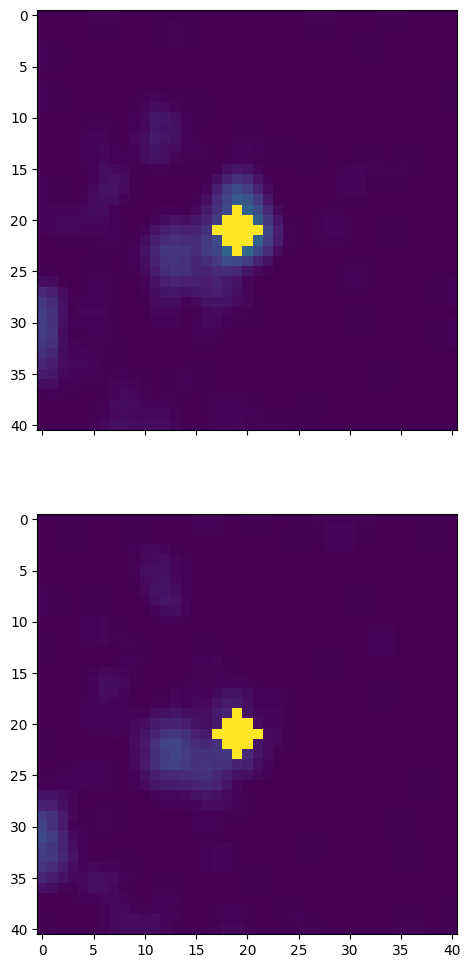

In [ ]:
# Q2.1.3: plot the mask on top of each image for both first and last frame in a joint plot, e.g top image correspond to first frame with mask annotated, and bottom image correspond to the last frame with mask annotated
# you can use `matplotlib.pyplot.subplots` to create a joint/subplot.  (documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
# Hint1: you can easily make the masked region visible by adding it to an image before plotting, e.g. plt.imshow(img+mask_cell*vmax, vmin=0, vmax=vmax)
import matplotlib.pyplot as plt


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,12), sharex=True)

ax1.imshow(img_gcamp_blurred[0]+mask_cell*vmax, vmin=0, vmax=vmax)
ax2.imshow(img_gcamp_blurred[1649]+mask_cell*vmax, vmin=0, vmax=vmax)



In [ ]:
# Q2.1.4: extract all pixel intensities inside the cell mask you have defined, e.g. for an image frame img[mask_cell]
# Create an array named 'intensities' of the shape (NUMBER_OF_FRAMES, n_pixels_mask) and populate it with pixel intensities for each frame
intensities = np.zeros((1650, n_pixels_mask) )
indecies = [0,0]*n_pixels_mask

for i in range(0,1650):
    for j in range(0, n_pixels_mask):
        for k in range(0,40):
            for l in range(0,40):
                if mask_cell[k,l]:
                    intensities[i,j] = img_gcamp_blurred[i,k,l]


print(intensities)

[[6.77777767 6.77777767 6.77777767 ... 6.77777767 6.77777767 6.77777767]
 [5.77777767 5.77777767 5.77777767 ... 5.77777767 5.77777767 5.77777767]
 [5.55555534 5.55555534 5.55555534 ... 5.55555534 5.55555534 5.55555534]
 ...
 [2.88888884 2.88888884 2.88888884 ... 2.88888884 2.88888884 2.88888884]
 [3.11111116 3.11111116 3.11111116 ... 3.11111116 3.11111116 3.11111116]
 [2.77777767 2.77777767 2.77777767 ... 2.77777767 2.77777767 2.77777767]]


In [ ]:
#print(len(intensities))

## 3. Extract intensity information

To analyze the relationship between `intensity` and `time`, we first need to extract the intensity of the cell from the image. One way of doing that would be extracting the _maximum_ intensity from each masked pixels. Then analyze the relationship between _maximum intensity of vertical lines_ vs. _time index_.

But the _maximum intensity of masked pixels_ is sensitive to few pixel values being very bright and many being dim. This means a few bright pixels can make a generally dim masked region appear brighter than it is, e.g. maximum intensity of the cell will be high. However, in the next frame, those few bright pixels might be removed and the maximum intensity will be low.

### 3.1 Quantile approximations
To avoid this type of fluctuation over time (i.e. have a more robust statistics over time), we will define the quantile approximation for each masked region. The `q`-quantile approximation value for a collection of pixels is defined as `the value that exactly q ratio of the data is smaller than it`.

In [ ]:
# Q3.1.1: use numpy to calculate 0.85 quantile for each masked pixels of the `intensities`, e.g. for each time index you should have a corresponding quantile value
# store your result as `intensities_quantile` and plot it vs time index.
# Hint1: you can use `numpy.quantile` function (documentation: https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)
# Hint2: notice that all pixels in the same frame correspond to `axis=1` in the `intensities`
intensities_quantile = np.zeros(1650)
for i in range (0, 1650):
    intensities_quantile[i] = np.quantile(intensities[i], 0.85)


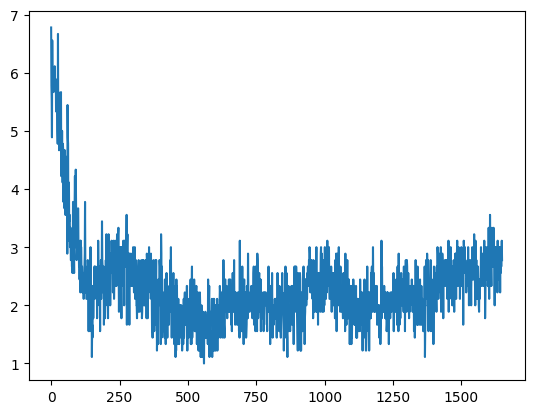

In [ ]:
plt.plot(range(0,1650), intensities_quantile)

# 4. Fit exponential funcion

We want to analyze the dependence of intensities vs. time. Our guess is that the dependence should be `exponentially decaying`. To estimate the exponential dependence we will use the Ordinary Least Squares method.

### 4.1 Aggregate intensities

First we will define a time index array to represent the time at each frame. Then for each frame, we will aggregate the pixel intensities into two statistical groups which represent average behavior and it's uncertainty respectively.

In [ ]:
# Q4.1.1: aggregate every 30 consecutive intensities and calculate average and standard error (skip last aggregation if there are less than 30 intensities to aggregate)
# define the array `ts` as the time at aggregated values, e.g. mean time for first 30 observations, mean time for second 30 observations, etc.
# store your final results as `intensities_mu` and `intensities_ste`, as averages and standard errors respectively
# Hint: the following are few lines of codes as hint
n_times = len(intensities_quantile)  # find out number of time indices
n_times_aggregated = n_times//30 if n_times%30 == 0 else (n_times//30) - 1  # find out how many segments with 30 time indices there are, e.g. drop last segment if it does not have 30 observations
ts = 15+np.arange(n_times_aggregated)*30  # generate time array
intensities_mu, intensities_ste = np.zeros(n_times_aggregated), np.zeros(n_times_aggregated)  # arrays that will hold values for averages and standard error
for idx in range(n_times_aggregated):
    il = idx*30
    ir = il+30
    intensities_to_aggregate = intensities_quantile[il:ir]  # select a small array of intensities that only include desired range
    intensities_mu[idx] = np.mean(intensities_to_aggregate)
    intensities_ste[idx] = np.std(intensities_to_aggregate)
    # Calculate mean and ste, and store in the arrays
print(intensities_mu)
print(intensities_ste)

[5.64814809 4.39999997 3.39259259 2.87407409 2.35185186 2.24444447
 2.3888889  2.64814815 2.74074073 2.63333331 2.31481483 2.36666665
 2.11851851 2.04444446 2.03703703 1.69629629 1.82592592 1.84444446
 1.57407408 1.74074074 1.79629629 2.09259258 2.00000002 1.95925927
 2.13703705 2.10740742 2.08888891 1.87407408 1.9        2.04074074
 1.92222224 2.44814814 2.30370369 2.44444445 2.34074074 2.17407407
 2.04074074 1.84814815 1.87037039 2.14444445 1.97037038 2.03703705
 2.16296297 2.23333335 2.06666665 2.0111111  2.16296297 2.5185185
 2.50740739 2.52592592 2.6037037  2.52592592 2.47037035 2.73703701
 2.68518519]
[0.49281528 0.61235562 0.711304   0.48324464 0.50762362 0.3766869
 0.3972643  0.31174979 0.39475298 0.4038396  0.33219971 0.35619154
 0.4562626  0.50560643 0.37551977 0.32322109 0.29631945 0.37251234
 0.31828156 0.33497537 0.29825741 0.32468196 0.27962351 0.38004044
 0.28499273 0.34364702 0.26973544 0.26408213 0.38527422 0.30829859
 0.41191115 0.27589482 0.33077205 0.34186608 0.3088

<ErrorbarContainer object of 3 artists>

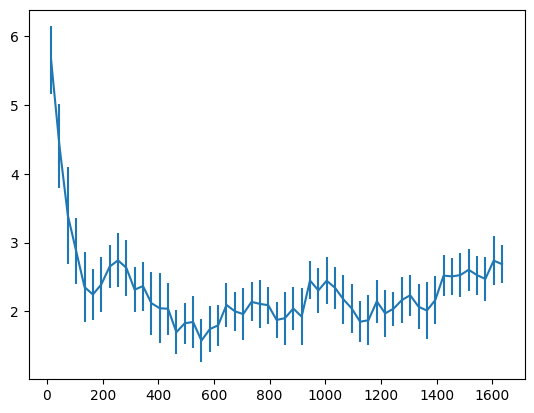

In [ ]:
# Q4.1.2: create an error bar plot of `intensities_mu` and errors `intensities_ste` vs `ts` (documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)
plt.errorbar(ts, intensities_mu, intensities_ste)

### 4.2 Best exponential fit using Ordinary Least Squares method

Let's find the best exponential fit parameters using the [Ordinary Least Squares method][1]. The function [scipy.optimize.curve_fit][2] is already written to perform this for us.

[1]: https://byjus.com/maths/least-square-method/#:~:text=The%20least%20square%20method%20is,the%20points%20from%20the%20curve.
[2]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html


In [ ]:
# Q4.2.1: define a function in python that given `t`, `A` and `beta`, returns `A*exp(-beta*t/100)`
# name this function `func_exp`.
# for example this is how to use the function to calculate `1.2 * exp(-2.0*0.1/100)` (A = 1.2, beta = 2.0, t = 0.1): `func_exp(0.1, 1.2, 2.0)` this should return the value of `1.2 * exp(-2.0*0.1/100)`.
def func_exp(t, A, beta, C):
    # Your code
    return A*np.exp(-beta*t/100) + C

print(func_exp(0.1, 1.2, 2.0, 2))

3.1976023984007997


In [ ]:
# Q4.2.2: following documentation of `scipy.optimize.curve_fit`, using `func_exp` and `intensities_mu`
# find best exponential fit parameters using Ordinary Least Squares
# name these parameters `A_ols` and `beta_ols` and print them
# Hint: you might need to use the argument `p0` explicitly
from scipy.optimize import curve_fit
params, covmatrix = curve_fit(func_exp, ts, intensities_mu)
print(params)
A_ols = params[0]
beta_ols = params[1]
C = params[2]

[4.5250993  1.68875512 2.16000045]


In [ ]:
print(covmatrix)

[[0.19165028 0.07474736 0.00045833]
 [0.07474736 0.05533079 0.00272257]
 [0.00045833 0.00272257 0.00169348]]


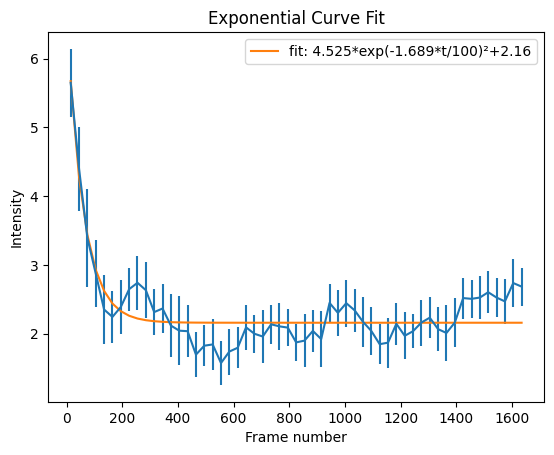

In [ ]:
# Q4.2.4: plot the error bar for `intensities_mu` vs `ts` (errors equal to `intensities_ste`), and
# add best fit exponentials using parameters from OLS
plt.errorbar(ts, intensities_mu, intensities_ste)
plt.plot(ts, func_exp(ts, *params), label=f'fit: '{round(A_ols, 3)} * exp(-{round(beta_ols, 3)} * t / 100) + {round(C, 3)}'

plt.title("Exponential Curve Fit")
plt.ylabel("Intensity")
plt.xlabel("Frame number")
plt.legend()
plt.show()

